In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from utils import calculate_income_1000_customers
from boruta import BorutaPy
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
np.random.seed(0)
X = pd.read_csv('data/x_train.txt', sep=' ', header=None).to_numpy()
y = pd.read_csv('data/y_train.txt', sep=' ', header=None).to_numpy().ravel()

N_ITER = 1
TRAIN_SIZE = 0.8

In [3]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

### RandomForestClassifier

In [4]:
model = RandomForestClassifier()
alpha = [0.01, 0.001, 0.0001]

accuracies = {a: [] for a in alpha} 
accuracies_top = {a: [] for a in alpha} 
income = {a: [] for a in alpha} 

for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    for a in alpha:
        print("Threshold: ", a, "\n\n")
        selector = BorutaPy(model, n_estimators='auto', verbose=2, max_iter=30, alpha=a)

        fit = selector.fit(X, y)
        selected = np.where(selector.support_)[0]     
        print("Number of selected features: ", len(selected), "\n\n")

        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        y_proba = model.predict_proba(X_test[:, selected])
        
        accuracies_top[a].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
        income[a].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])      
        accuracies[a].append(accuracy_score(y_test, y_pred)) 

Threshold:  0.01 

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	9 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	10 / 30
Confirmed: 	0
Tentative: 	20
Rejected: 	480
Iteration: 	11 / 30
Confirmed: 	7
Tentative: 	13
Rejected: 	480
Iteration: 	12 / 30
Confirmed: 	7
Tentative: 	13
Rejected: 	480
Iteration: 	13 / 30
Confirmed: 	7
Tentative: 	13
Rejected: 	480
Iteration: 	14 / 30
Confirmed: 	7
Tentative: 	13
Rejected: 	480
Iteration: 	15 / 30
Confirmed: 	7
Tentative: 	11
Rejected: 	482
Iteration: 	16 / 30
Confirmed: 	7
Tenta

In [5]:
avg_accuracies = [np.mean(accuracies[a]) for a in alpha]
avg_accuracies_top = [np.mean(accuracies_top[a]) for a in alpha]
avg_income = [np.mean(income[a]) for a in alpha]

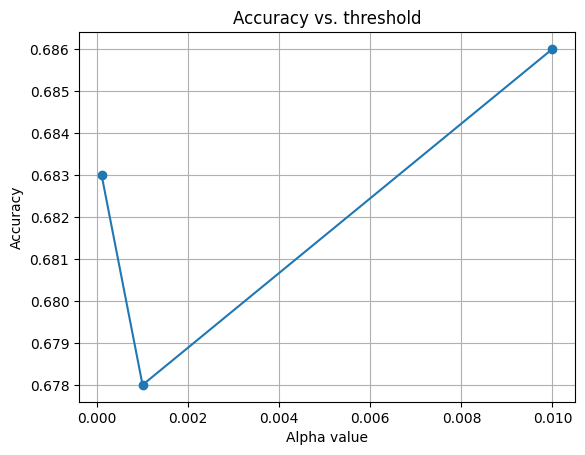

In [6]:
plt.plot(alpha, avg_accuracies, marker='o')
plt.xlabel('Alpha value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. threshold')
plt.grid(True)
plt.show()

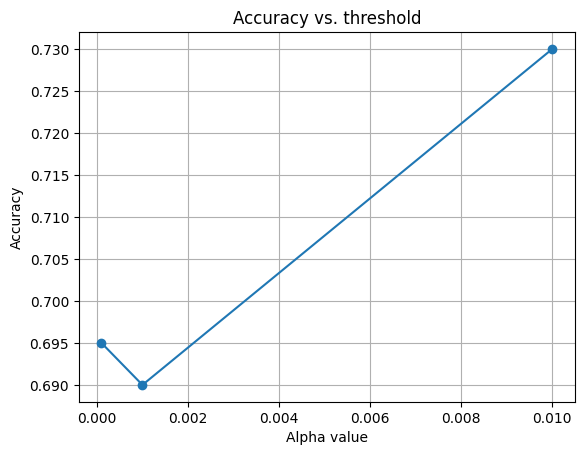

In [7]:
plt.plot(alpha, avg_accuracies_top, marker='o')
plt.xlabel('Alpha value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. threshold')
plt.grid(True)
plt.show()

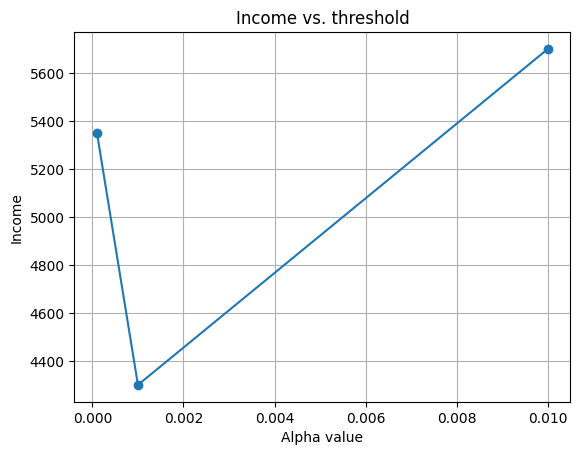

In [8]:
plt.plot(alpha, avg_income, marker='o')
plt.xlabel('Alpha value')
plt.ylabel('Income')
plt.title('Income vs. threshold')
plt.grid(True)
plt.show()

### ExtraTreesClassifier

In [15]:
model = ExtraTreesClassifier()

alpha = [0.01, 0.001, 0.0001]

accuracies = {a: [] for a in alpha} 
accuracies_top = {a: [] for a in alpha} 
income = {a: [] for a in alpha} 

for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    for a in alpha:
        print("Threshold: ", a, "\n\n")
        selector = BorutaPy(model, n_estimators='auto', verbose=2, max_iter=30, alpha=a)

        fit = selector.fit(X, y)
        selected = np.where(selector.support_)[0]     
        print("Number of selected features: ", len(selected), "\n\n")

        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        y_proba = model.predict_proba(X_test[:, selected])
        
        accuracies_top[a].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
        income[a].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])      
        accuracies[a].append(accuracy_score(y_test, y_pred)) 

Threshold:  0.01 

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	9 / 30
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	10 / 30
Confirmed: 	0
Tentative: 	23
Rejected: 	477
Iteration: 	11 / 30
Confirmed: 	14
Tentative: 	9
Rejected: 	477
Iteration: 	12 / 30
Confirmed: 	14
Tentative: 	9
Rejected: 	477
Iteration: 	13 / 30
Confirmed: 	14
Tentative: 	9
Rejected: 	477
Iteration: 	14 / 30
Confirmed: 	14
Tentative: 	9
Rejected: 	477
Iteration: 	15 / 30
Confirmed: 	14
Tentative: 	9
Rejected: 	477
Iteration: 	16 / 30
Confirmed: 	14
Tent

In [16]:
avg_accuracies = [np.mean(accuracies[a]) for a in alpha]
avg_accuracies_top = [np.mean(accuracies_top[a]) for a in alpha]
avg_income = [np.mean(income[a]) for a in alpha]

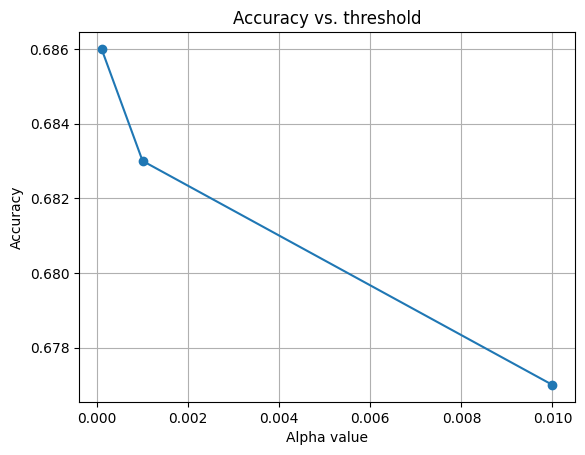

In [17]:
plt.plot(alpha, avg_accuracies, marker='o')
plt.xlabel('Alpha value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. threshold')
plt.grid(True)
plt.show()

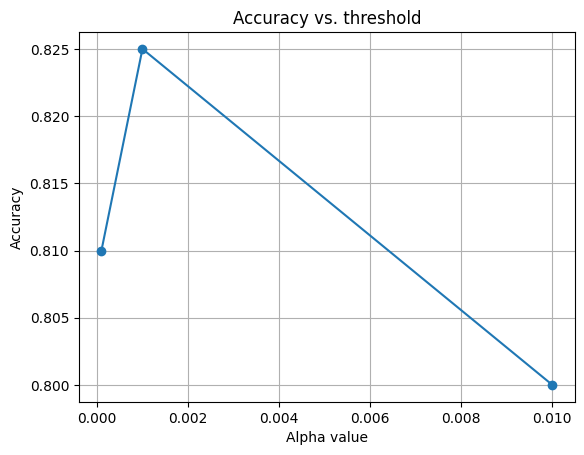

In [18]:
plt.plot(alpha, avg_accuracies_top, marker='o')
plt.xlabel('Alpha value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. threshold')
plt.grid(True)
plt.show()

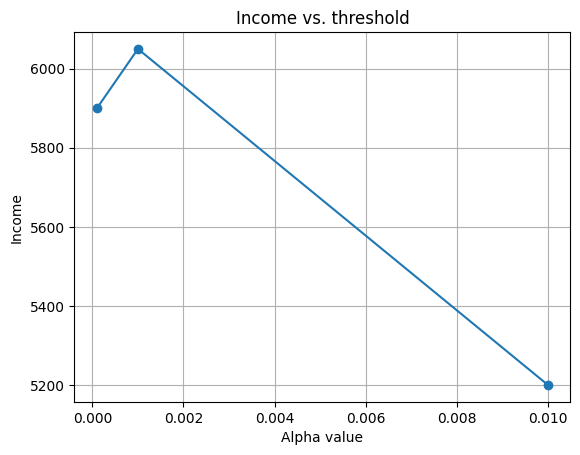

In [19]:
plt.plot(alpha, avg_income, marker='o')
plt.xlabel('Alpha value')
plt.ylabel('Income')
plt.title('Income vs. threshold')
plt.grid(True)
plt.show()